In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


### Importação e tratamento dos dados ###

In [ ]:
dados =pd.read_csv("Trumps Legcy.csv")
dados.head()

,id,text,device,favorites,retweets,date
0,98455000000000000,Republicans and Democrats have both created ou...,TweetDeck,49,255,8/2/2011 18:07
1,1234650000000000000,I was thrilled to be back in the Great city of...,Twitter for iPhone,73748,17404,3/3/2020 1:34
2,1218010000000000000,RT @CBS_Herridge: READ: Letter to surveillance...,Twitter for iPhone,0,7396,1/17/2020 3:22
3,1304880000000000000,The Unsolicited Mail In Ballot Scam is a major...,Twitter for iPhone,80527,23502,9/12/2020 20:10
4,1218160000000000000,RT @MZHemingway: Very friendly telling of even...,Twitter for iPhone,0,9081,1/17/2020 13:13


In [ ]:
dados.drop('id', axis=1, inplace=True)

In [ ]:
dados['date'] = pd.to_datetime(dados['date'], format="%m/%d/%Y %H:%M")

In [ ]:
dados['date'] = dados['date'].map(lambda x: x.strftime("%Y-%m"))

In [ ]:
dados['text'] = dados['text'].str.lower()

In [ ]:
import re

dados['text'] = dados['text'].apply(lambda x: re.sub(r'[\@\:\_\.\;\#\"\'\$\%\&]', "", str(x)))

In [ ]:
dados.head()

,text,device,favorites,retweets,date
0,republicans and democrats have both created ou...,TweetDeck,49,255,2011-08
1,i was thrilled to be back in the great city of...,Twitter for iPhone,73748,17404,2020-03
2,rt cbsherridge read letter to surveillance cou...,Twitter for iPhone,0,7396,2020-01
3,the unsolicited mail in ballot scam is a major...,Twitter for iPhone,80527,23502,2020-09
4,rt mzhemingway very friendly telling of events...,Twitter for iPhone,0,9081,2020-01


### Análise dos Sentimentos ###

In [ ]:
sentiment = SentimentIntensityAnalyzer()

In [ ]:
sentiments = [sentiment.polarity_scores(i) for i in dados['text'].values]
dados['Negative Score'] = [i['neg'] for i in sentiments]
dados['Positivo Score'] = [i['pos'] for i in sentiments]
dados['Neuter Score'] = [i['neu'] for i in sentiments]
dados['Compound Score'] = [i['compound'] for i in sentiments]

In [ ]:
score = dados['Compound Score'].values

In [ ]:
t=[]
for i in score:
  if i >= 0.05:
    t.append('Positive')
  elif i <= -0.05:
    t.append("Negative")
  else:
    t.append('Neutral')

dados['Sentiment'] = t

In [ ]:
dados.head()

,text,device,favorites,retweets,date,Negative Score,Positivo Score,Neuter Score,Compound Score,Sentiment
0,republicans and democrats have both created ou...,TweetDeck,49,255,2011-08,0.231,0.171,0.598,-0.1779,Negative
1,i was thrilled to be back in the great city of...,Twitter for iPhone,73748,17404,2020-03,0.000,0.447,0.553,0.9792,Positive
2,rt cbsherridge read letter to surveillance cou...,Twitter for iPhone,0,7396,2020-01,0.000,0.000,1.000,0.0000,Neutral
3,the unsolicited mail in ballot scam is a major...,Twitter for iPhone,80527,23502,2020-09,0.294,0.000,0.706,-0.9551,Negative
4,rt mzhemingway very friendly telling of events...,Twitter for iPhone,0,9081,2020-01,0.000,0.143,0.857,0.5413,Positive


### Explorando os dados ###

Text(0.5, 1.0, 'Distribuição de Sentimento')

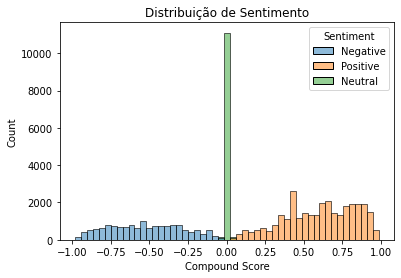

In [ ]:
sns.histplot(data=dados, x='Compound Score', hue='Sentiment').set_title("Distribuição de Sentimento")

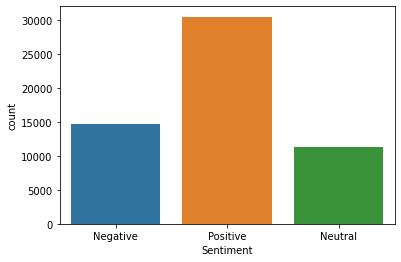

In [ ]:
sns.countplot(data=dados, x='Sentiment')

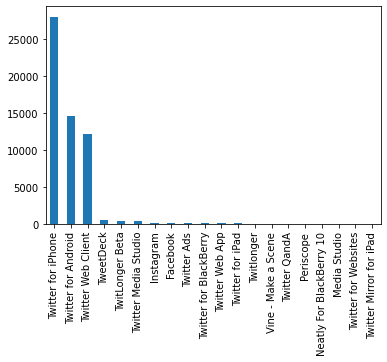

In [ ]:
dados['device'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Número de Retweets e Favoritos de acordo com os Sentimento')

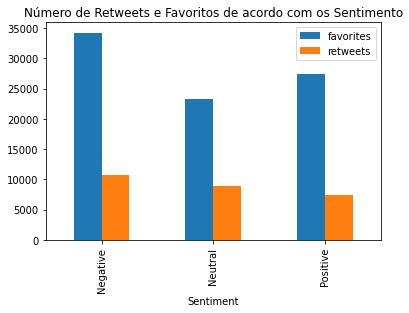

In [ ]:
dados[['favorites','retweets']].groupby(dados['Sentiment']).mean().plot(kind='bar').set_title("Número de Retweets e Favoritos de acordo com os Sentimento")

### Clinton ###

In [ ]:
clinton = dados[dados['text'].str.contains("clinton")]

In [ ]:
clinton.head()

,text,device,favorites,retweets,date,Negative Score,Positivo Score,Neuter Score,Compound Score,Sentiment
1541,obama worked harder for hillary clinton and th...,Twitter for iPhone,172471,36677,2020-08,0.068,0.168,0.763,0.5837,Positive
2755,response to hillary clinton- http//tco/nzyfehyura,Twitter Web Client,660,437,2015-07,0.000,0.000,1.000,0.0000,Neutral
3244,was andy mccabe ever forced to pay back the 70...,Twitter for iPhone,137435,39781,2020-09,0.118,0.000,0.882,-0.6553,Negative
3313,rt dailycaller joe biden’s town hall with hill...,Twitter for iPhone,0,4523,2020-04,0.000,0.205,0.795,0.5574,Positive
3661,rt lizwheeler imagine going after the nra but ...,Twitter for iPhone,0,26940,2020-08,0.215,0.000,0.785,-0.5499,Negative


Text(0.5, 1.0, 'Distribuição dos Sentimentos - Clinton')

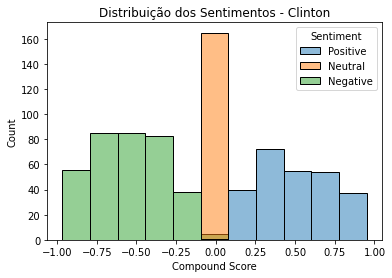

In [ ]:
sns.histplot(data=clinton, x='Compound Score', hue='Sentiment').set_title("Distribuição dos Sentimentos - Clinton")

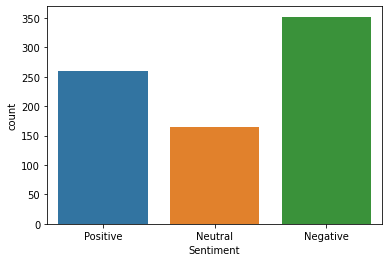

In [ ]:
sns.countplot(data=clinton, x='Sentiment')

Text(0.5, 1.0, 'Retweets e Favoritos de acordo com os Sentimentos - Clinton')

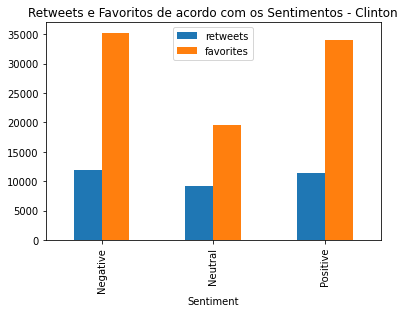

In [ ]:
clinton[['retweets','favorites']].groupby(clinton['Sentiment']).mean().plot(kind='bar').set_title("Retweets e Favoritos de acordo com os Sentimentos - Clinton")

### Biden ###

In [ ]:
biden = dados[dados['text'].str.contains("biden")]

Text(0.5, 1.0, 'Distribuição dos tweets relacionados a Biden de acordo com os Sentimentos')

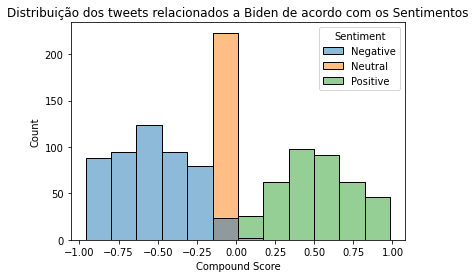

In [ ]:
sns.histplot(data=biden, x='Compound Score', hue='Sentiment').set_title("Distribuição dos tweets relacionados a Biden de acordo com os Sentimentos")

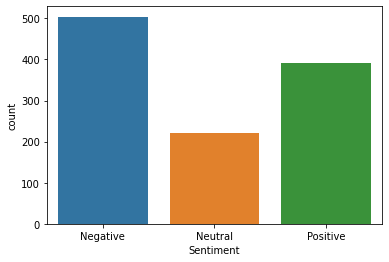

In [ ]:
sns.countplot(data=biden, x='Sentiment')

Text(0.5, 1.0, 'Retweets e Favoritos de acordo com os Sentimentos - Biden')

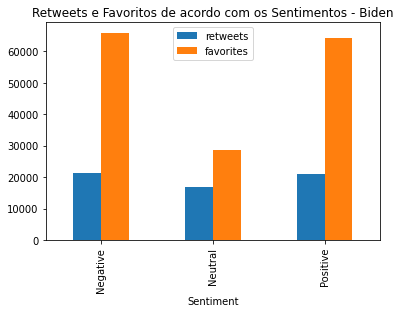

In [ ]:
biden[['retweets','favorites']].groupby(dados['Sentiment']).mean().plot(kind='bar').set_title("Retweets e Favoritos de acordo com os Sentimentos - Biden")

### Putin ###

In [ ]:
putin = dados[dados['text'].str.contains("putin")]

Text(0.5, 1.0, 'Distribuição dos tweets relacionados a Putin de acordo com os Sentimentos')

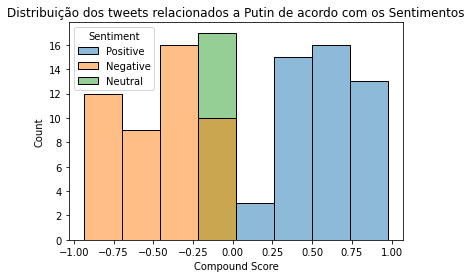

In [ ]:
sns.histplot(data=putin, x='Compound Score', hue='Sentiment').set_title("Distribuição dos tweets relacionados a Putin de acordo com os Sentimentos")

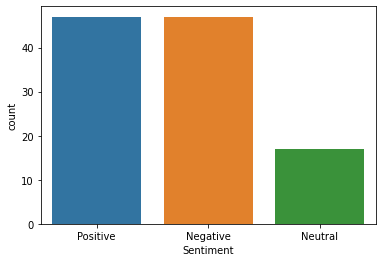

In [ ]:
sns.countplot(data=putin, x='Sentiment')

Text(0.5, 1.0, 'Retweets e Favoritos de acordo com os Sentimentos - Putin')

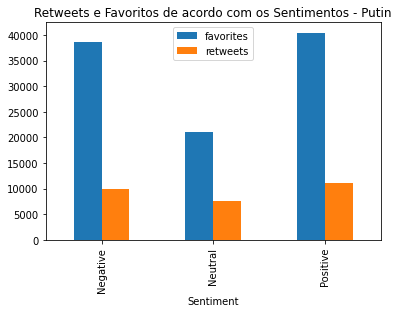

In [ ]:
putin[['favorites','retweets']].groupby(putin['Sentiment']).mean().plot(kind='bar').set_title("Retweets e Favoritos de acordo com os Sentimentos - Putin")

### Russia ###

In [ ]:
russia = dados[dados['text'].str.contains("russia")]

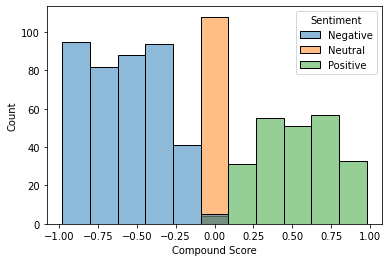

In [ ]:
sns.histplot(data=russia, x='Compound Score', hue='Sentiment')

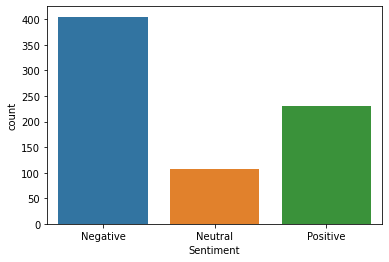

In [ ]:
sns.countplot(data=russia, x='Sentiment')

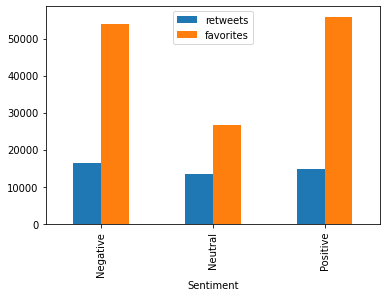

In [ ]:
russia[['retweets','favorites']].groupby(russia["Sentiment"]).mean().plot(kind='bar')

### Liberals ###

In [ ]:
liberals = dados[dados['text'].str.contains("liberals")]

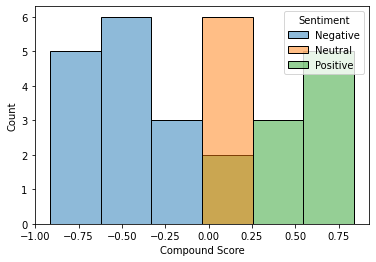

In [ ]:
sns.histplot(data=liberals, x='Compound Score', hue='Sentiment')

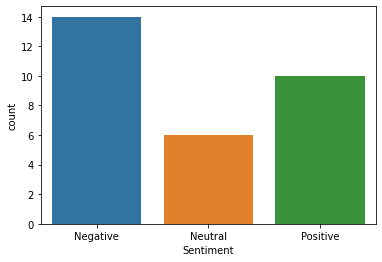

In [ ]:
sns.countplot(data=liberals, x='Sentiment')